# Safe Driver Prediction
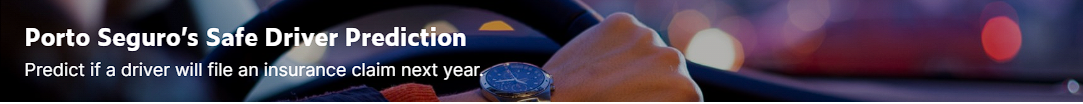

### Problem Statement:
- To predict if driver will file an insurance claim next year or not for a insurance company

### Data Description
In this competition, you will predict the probability that an auto insurance policy holder files a claim.
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In this notebook we will be conducting data analysis, building models and comparing models with each other for for finding the most effective model that gets the job done for prediction of claims.

### Summary:
- In this project we will be exploring the [Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) dataset and will be finding some interesting facts about this dataset and will be building a model to predict if a car owner is going to claim insurance or not base on the data that is provided to us.
- We will be performing all the necessary steps to build a model and where our first step after loading data will be to replace -1 with np.nan as it is given in the description that values with -1 indicates that the feature was missing.
- As most of the columns in the data set are numeric and categorical we will be filling nan's with the most frequent values and will be checking for outliers are there or not if our model performance is not good the we will either remove outliers or will be assigning them median value of the respective column.
- As data description is not given we will be performing hypothesis testing and and building correlation matrix to check the relation between out input variables and target variables.
- After looking at the data I can see that the our data is no the same scale for all the columns so at first we will not be doing any kind of data transformation and will be building model with out that and if the model does not preform good then we will be doing data transformation.
- We will be building Logistic regression, Decision tree and Random forest models and will be comparing them with each other to check which one performs the best.

## STEP 1 Installing necessary packages and downloading data.

In [1]:
%pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jovian

<IPython.core.display.Javascript object>

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="Course-Project-machine-learning-final", filename='course-projects-real-world-machine-learning-model.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rushikeshshindesandesh/course-project-machine-learning-final" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/rushikeshshindesandesh/course-project-machine-learning-final


'https://jovian.com/rushikeshshindesandesh/course-project-machine-learning-final'

In [4]:
%pip install numpy pandas matplotlib seaborn plotly --quiet
%pip install scipy opendatasets xgboost graphviz scikit-learn xgboost --upgrade --quiet
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [6]:
dataset_url = 'https://www.kaggle.com/c/porto-seguro-safe-driver-prediction'
od.download(dataset_url)

Skipping, found downloaded files in ".\porto-seguro-safe-driver-prediction" (use force=True to force download)


In [7]:
os.listdir("./porto-seguro-safe-driver-prediction/")

['sample_submission.csv', 'test.csv', 'train.csv']

## Reading Data

In [8]:
train_df = pd.read_csv('./porto-seguro-safe-driver-prediction/train.csv')

In [9]:
test_df = pd.read_csv('./porto-seguro-safe-driver-prediction/test.csv')

In [10]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [11]:
train_df.shape

(595212, 59)

In [12]:
test_df.shape

(892816, 58)

- So we are having less data for model training and more for testing.

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [14]:
train_df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## STEP 2 Preprocessing

Droping unecessary columns.

In [15]:
train_df = train_df.replace({-1:np.nan})

In [16]:
train_df = train_df.drop(columns='id')

In [17]:
train_df.head(1)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1


In [18]:
test_df.head(1)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1


In [19]:
test_df = test_df.drop(columns='id')

In [20]:
test_df.head(1)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1


## Checking nulls

In [21]:
# Cheching for null columns
train_df.isnull().sum()[train_df.isnull().sum()*100/train_df.shape[0]>40]

ps_car_03_cat    411231
ps_car_05_cat    266551
dtype: int64

In [22]:
# These columns are having null values more then 40% so we will drop them
train_df.drop(columns=['ps_car_03_cat', 'ps_car_05_cat'], inplace=True)

In [23]:
test_df.drop(columns=['ps_car_03_cat', 'ps_car_05_cat'], inplace=True)

In [24]:
null_col = list(train_df.isnull().sum()[train_df.isnull().sum()*100/train_df.shape[0]>0].index)
null_col

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [25]:
# We will use mode to fill null values as all of the columns are categorical
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent').fit(train_df[null_col])

train_df[null_col] = impute.transform(train_df[null_col])

In [26]:
# this should be an empty list
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

In [27]:
train_df.shape

(595212, 56)

## EDA

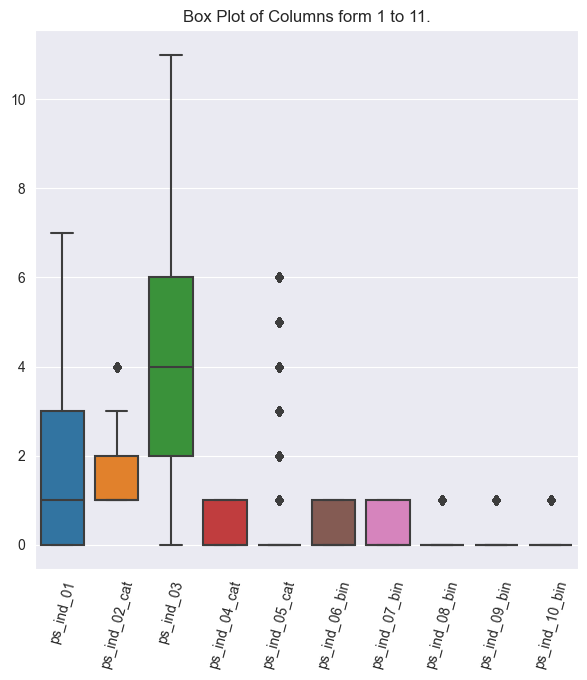

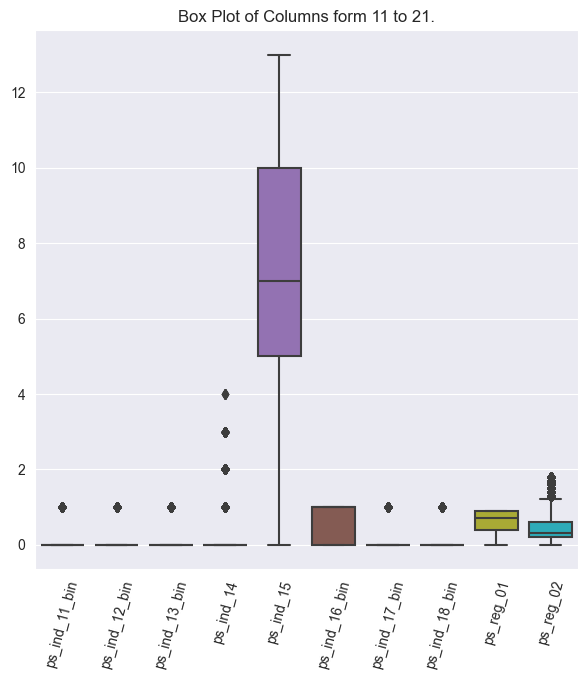

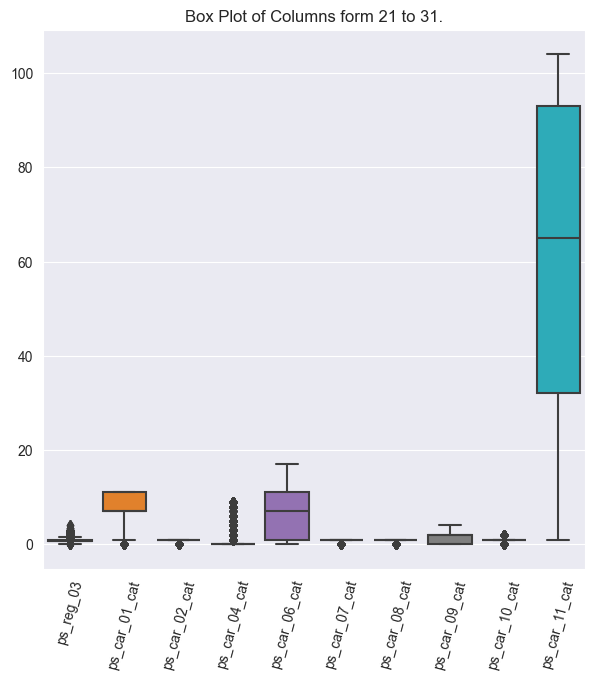

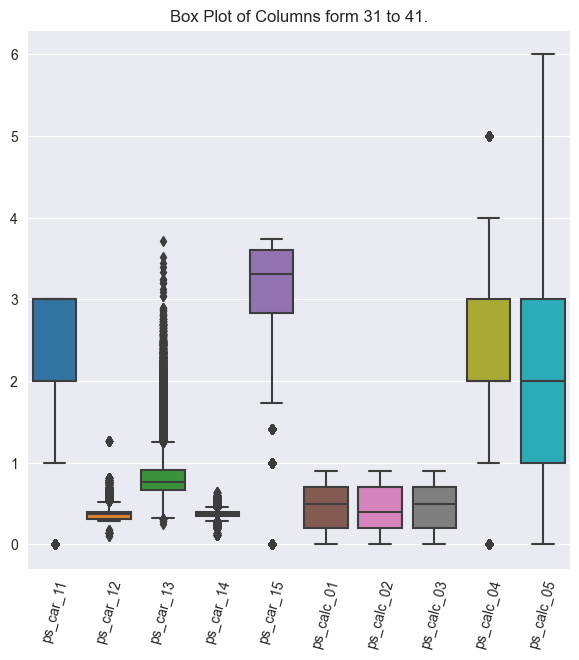

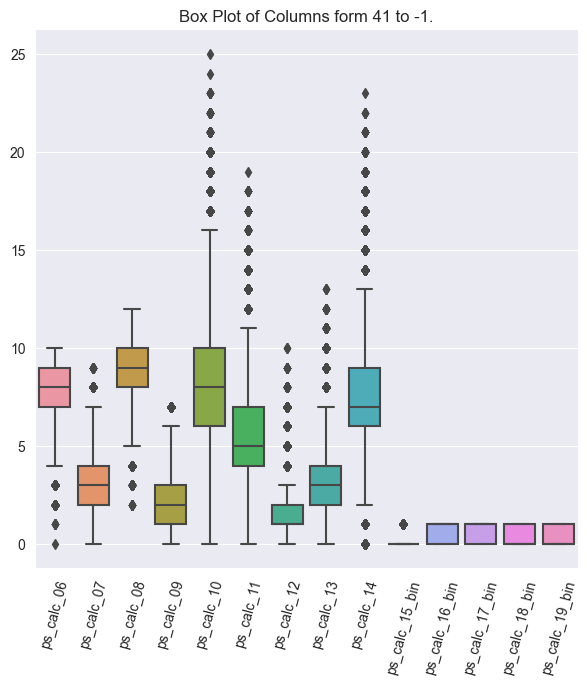

In [28]:
indx = list(range(1,51,10))
indx.append(-1)
for i in range(1,len(indx)):
  start = i-1
  end = i
  sns.set_style('darkgrid')
  plt.figure(figsize=(7,7))
  sns.boxplot(data=train_df.iloc[:, indx[start]:indx[end]])
  plt.title(f"Box Plot of Columns form {indx[start]} to {indx[end]}.")
  plt.xticks(rotation=75)
  plt.show()

So as we can see there are a lot of outliers in lot of columns and as we don't have any description of columns we are not able to do a proper data visualization, so we will use hypothesis testing for finding the relationship betwwen our input variables and target variable.

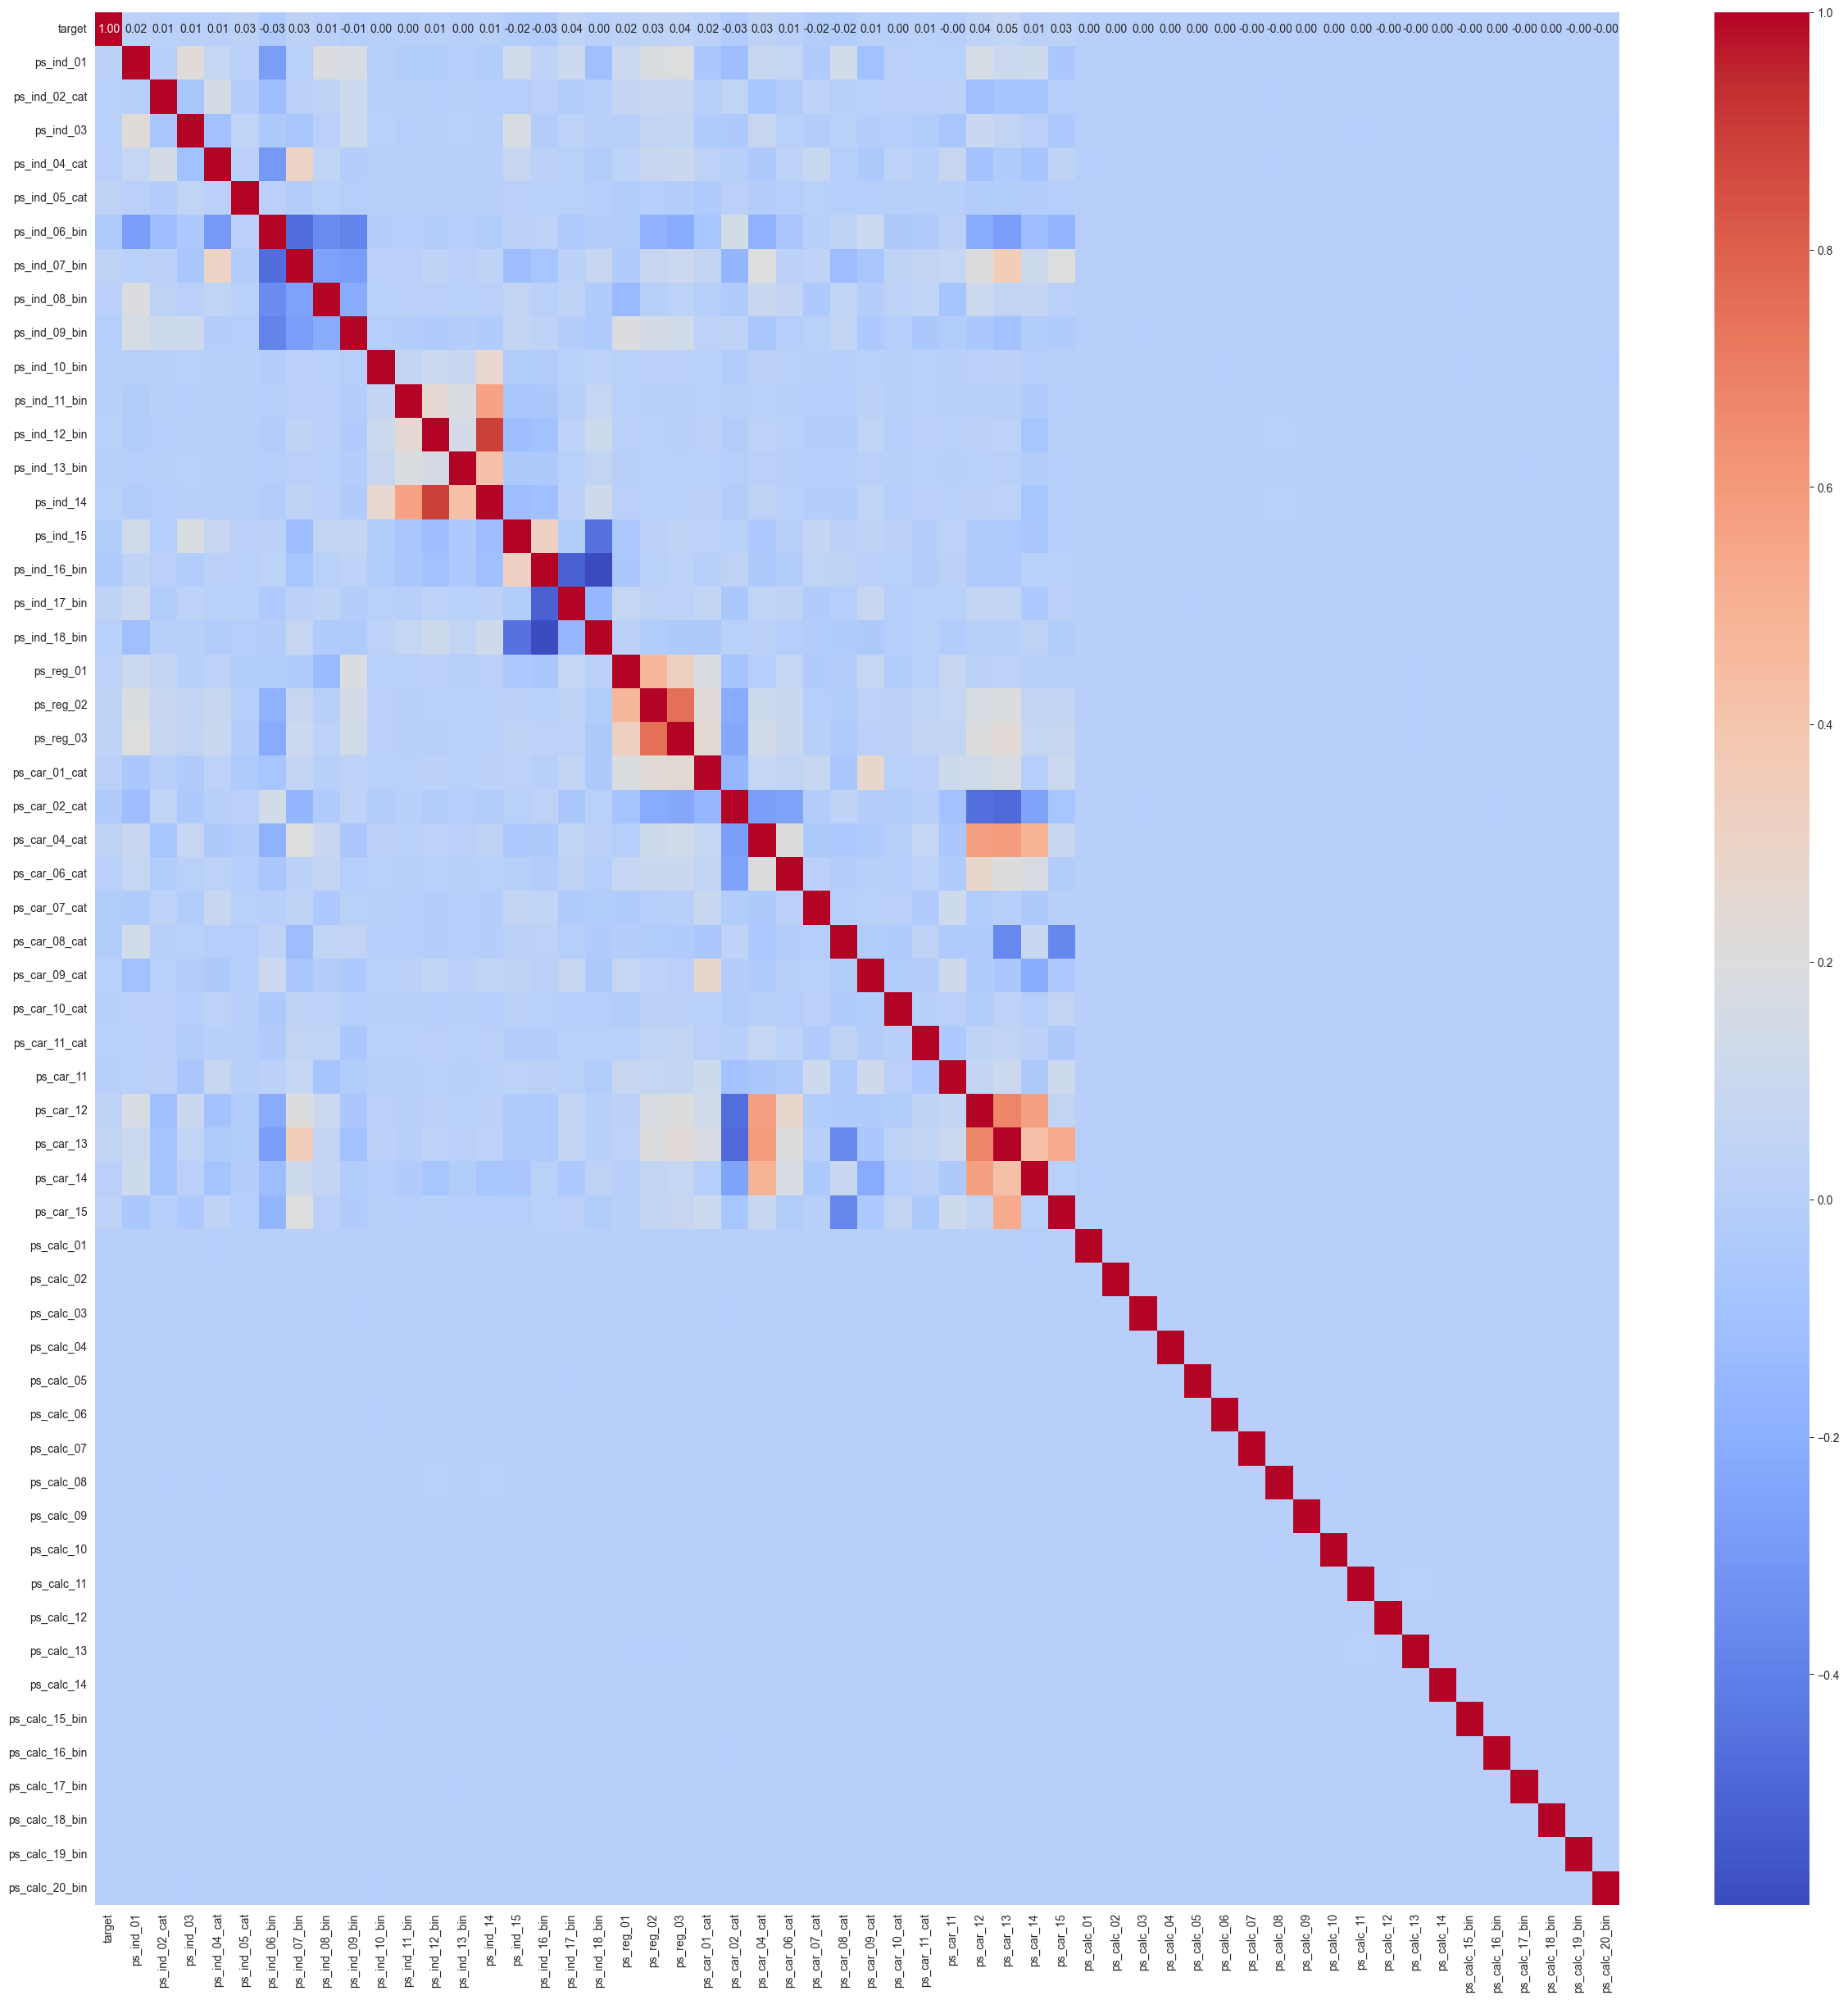

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(data=train_df.corr(),cmap='coolwarm', fmt='.2f', annot=True);

- we can see that ps_ind_12_bin and ps_ind_14, ps_reg_2 and ps_reg_3 are highly correlated with each other, almost all of the other columns have correlation less then 0.60.

- Using chi-squared test we will find which columns have relation with our target variable.

In [30]:
input_col = train_df.columns[1:-1]
input_col

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin'],
      dtype='object')

In [31]:
from scipy.stats import chi2_contingency

In [32]:
significant_col = []
Imp = []

for i in input_col:
  tab = pd.crosstab(train_df[i], train_df['target'])
  res = chi2_contingency(tab)
  if res[1] < .05:
    significant_col.append(i)
    Imp.append(res[1])

feature_imp = pd.DataFrame()
feature_imp['Features'] = significant_col
feature_imp['Importance'] = Imp
sorted_feat = feature_imp.sort_values('Importance')
sorted_feat = sorted_feat.reset_index().drop('index', axis=1)
sorted_feat

,Features,Importance
0,ps_car_13,0.000000e+00
1,ps_car_11_cat,1.463440e-244
2,ps_car_12,1.434195e-204
3,ps_reg_02,7.928386e-181
4,ps_car_04_cat,1.041262e-180
5,ps_ind_17_bin,1.355511e-179
6,ps_car_14,2.985186e-169
7,ps_car_06_cat,8.853000e-166
8,ps_car_01_cat,7.307895e-160
9,ps_ind_05_cat,4.106804e-154


- these are variables which are having relation with our target variable and the most important one in is ps_car_13 which has pvalue 0 as is the most is most important feature.

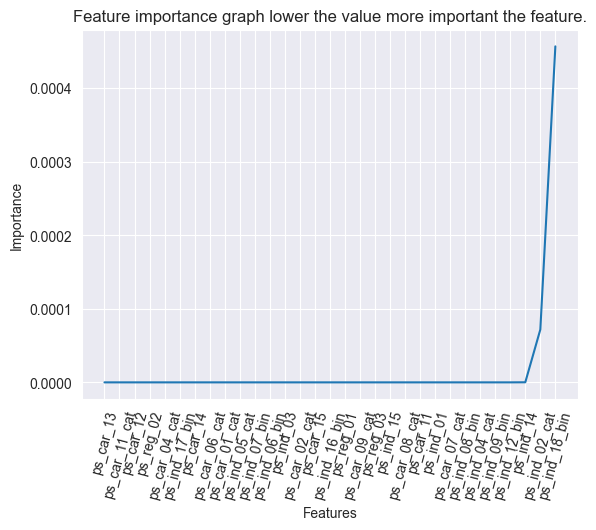

In [33]:
sns.lineplot(data = sorted_feat, x='Features', y='Importance');
plt.xticks(rotation=75)
plt.title('Feature importance graph lower the value more important the feature.')
plt.show()

The above chart shows the importance of the column with respect to our target variable and how closely the column is related to our target variable (the closer the value to 0 the more related the column is).

We will not be doing Label encoding or data transformation as the data is already numeric, also the data is no the same scale for all the columns. We will perform data transformation if the models are not preforming good. 

## STEP 3 Data sampling

In [34]:
train_df['target'].value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

- We will face the issue of class imbalance

In [35]:
train_df1 = train_df[train_df['target']==1]
train_df1 = pd.concat([train_df, train_df1, train_df1, train_df1, train_df1])

- we will do upsampling with above technique to solve class imbalance problem

In [36]:
x = train_df1.drop('target', axis=1)
y = train_df1['target']
x.shape, y.shape

((681988, 55), (681988,))

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

tr_x, ts_x, tr_y, ts_y = train_test_split(x, y, test_size=.2, random_state=42)
tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((545590, 55), (136398, 55), (545590,), (136398,))

## STEP 4 Model Building and testing

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

logreg = LogisticRegression(C=10, penalty='l2', solver='saga', n_jobs=-1)
logreg.fit(tr_x, tr_y)
test_pred = logreg.predict(ts_x)
print("confusion matrix\n")
print(confusion_matrix(ts_y, test_pred),end="\n")
print(classification_report(ts_y, test_pred))

confusion matrix

[[114868     49]
 [ 21445     36]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    114917
           1       0.42      0.00      0.00     21481

    accuracy                           0.84    136398
   macro avg       0.63      0.50      0.46    136398
weighted avg       0.78      0.84      0.77    136398



- logistic regression does'nt perform good in any any terms as it is not able to perform good for class 1 in terms of precision and recall.

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(tr_x, tr_y)
test_pred = dt.predict(ts_x)
print("confusion matrix\n")
print(confusion_matrix(ts_y, test_pred),end="\n")
print(classification_report(ts_y, test_pred))

confusion matrix

[[109098   5819]
 [    45  21436]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    114917
           1       0.79      1.00      0.88     21481

    accuracy                           0.96    136398
   macro avg       0.89      0.97      0.93    136398
weighted avg       0.97      0.96      0.96    136398



- Decision tree is performing good in terms of accuracy, recall which is 95% and 100% respectively for class 1 but the precision is low 77% for class one. Changing the hyper parameter is decreasing the recall and precision.

In [40]:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = train_df.columns[1:]
feat_imp['Imp'] = dt.feature_importances_
feat_imp.sort_values('Imp', ascending=False).head(10)

,Feature,Imp
32,ps_car_13,0.089492
20,ps_reg_03,0.069502
33,ps_car_14,0.049913
44,ps_calc_10,0.037745
48,ps_calc_14,0.036890
45,ps_calc_11,0.035192
29,ps_car_11_cat,0.034982
35,ps_calc_01,0.034609
36,ps_calc_02,0.034412
37,ps_calc_03,0.034130


- These are the top 10 features with highest importance according to decision tree.
- In feature we will be building model using these feature and check if we can get the same kind of results.

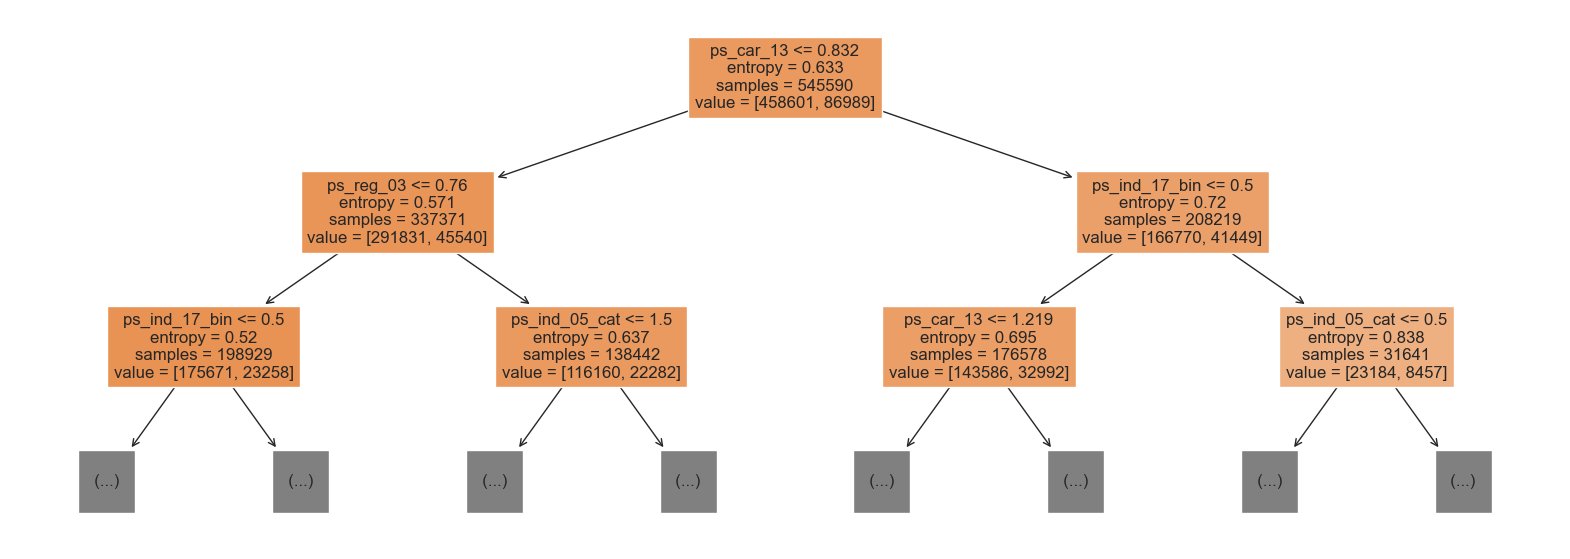

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,7))
plt.title("Ploting tree for Decisiontree.")
plot_tree(decision_tree = dt, max_depth=2, filled=True, feature_names=list(dt.feature_names_in_));

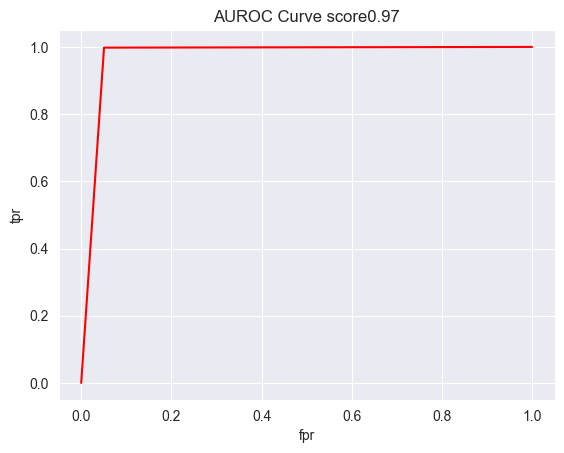

In [42]:
test_pred_prob = dt.predict_proba(ts_x)
roc_scr = roc_auc_score(ts_y, test_pred_prob[:,1])

fpr, tpr, thresh = roc_curve(ts_y, test_pred_prob[:,1])

plt.plot(fpr, tpr, '-', color='r');
plt.title(f"AUROC Curve score{round(roc_scr, 2)}")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(tr_x, tr_y)
test_pred = rfc.predict(ts_x)
print("confusion matrix\n")
print(confusion_matrix(ts_y, test_pred),end="\n")
print(classification_report(ts_y, test_pred))

confusion matrix

[[114917      0]
 [    45  21436]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114917
           1       1.00      1.00      1.00     21481

    accuracy                           1.00    136398
   macro avg       1.00      1.00      1.00    136398
weighted avg       1.00      1.00      1.00    136398



- Randomforest is performing best out of all the three models with out any hyperparameter tuning, just by doing upsampling for class imbalance random forest is able to performe good with 100% accuracy, recall and precision.

In [44]:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = train_df.columns[1:]
feat_imp['Imp'] = rfc.feature_importances_
feat_imp.sort_values('Imp', ascending=False).head(10)

,Feature,Imp
32,ps_car_13,0.061896
20,ps_reg_03,0.055374
33,ps_car_14,0.044885
44,ps_calc_10,0.037214
48,ps_calc_14,0.036400
2,ps_ind_03,0.034524
45,ps_calc_11,0.034454
29,ps_car_11_cat,0.033860
14,ps_ind_15,0.033382
37,ps_calc_03,0.032432


- These are the top 10 features with highest importance according to decision tree.
- In feature we will be building model using these feature and check if we can get the same kind of results.

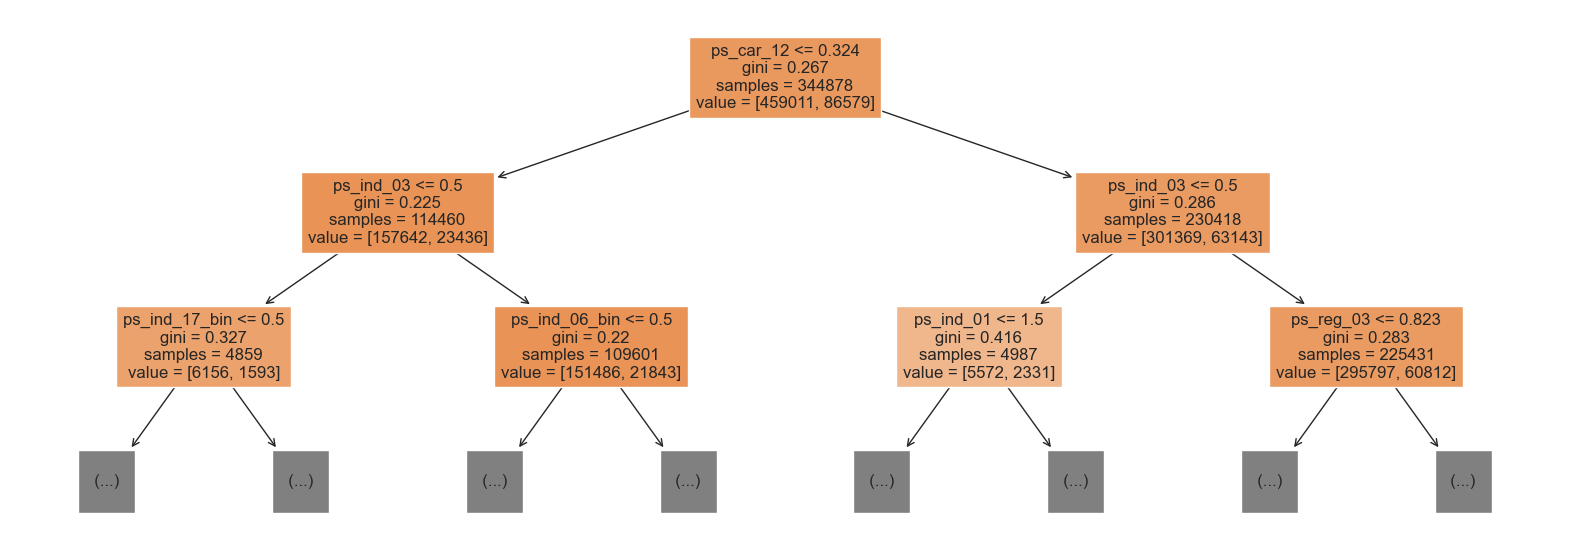

In [45]:
plt.figure(figsize=(20,7))
plt.title("Ploting tree for Randomforest.")
plot_tree(decision_tree = rfc.estimators_[0], max_depth=2, filled=True, feature_names=list(rfc.feature_names_in_));

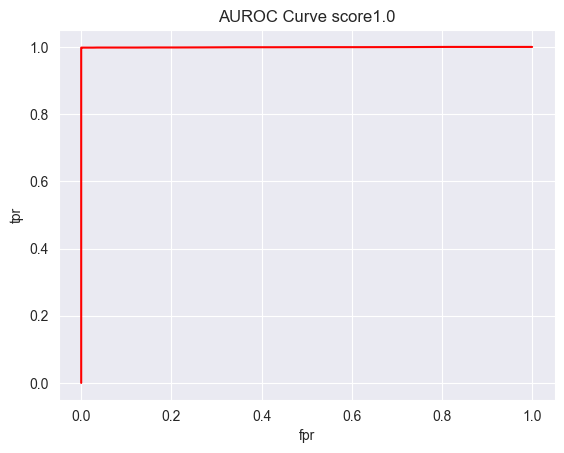

In [46]:
test_pred_prob = rfc.predict_proba(ts_x)
roc_scr = roc_auc_score(ts_y, test_pred_prob[:,1])

fpr, tpr, thresh = roc_curve(ts_y, test_pred_prob[:,1])

plt.plot(fpr, tpr, '-', color='r');
plt.title(f"AUROC Curve score{round(roc_scr, 2)}")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [47]:
# now lets do testing on the provided test data
test_pred = rfc.predict(test_df)
test_pred_prob = rfc.predict_proba(test_df)

In [48]:
test_df.shape

(892816, 55)

In [49]:
sub = pd.read_csv('./porto-seguro-safe-driver-prediction/sample_submission.csv')
sub.shape

(892816, 2)

In [50]:
sub['target'] = test_pred_prob
sub.shape

(892816, 2)

In [51]:
sub.to_csv('Submission.csv', index=None)

## Conclusion

- Random forest is preforming the best among all the 3 models and is also preforming with 100% accuracy, recall and precision for both the classes i did hyper parameter tuning which is resulting in the decrease of the results, same goes for decision tree but it is not performing good in terms of precision for class 1 other wise the model is good and as all the results are based on test data we can say the the models are not over fitted and can deploy these model for real life and test the model performance.
- logistic regression is not performing good for any of the results except accuracy which is coming to high due to class 0.

### Further ideas
- As there are a lot of input variables in the dataset what we can do is that try to build an model using variables selected by chi-square test, decision tree or random forest and see if we get the same kind of results by reducing the input variables.
- By doing this company will not have to look or collect the data for all the variables provided in dataset and will be able to predict if a person will claim the insurance or not based on less data.
- So our future goad will be to reduce the dimension of the dataset by using some feature selection methods like chi-square, decision tree random forest and many more.

### Reference
- [Kaggle](https://www.kaggle.com/) for dataset. 
- [Source](https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model/resources) were I found the data set.
- [Learnings](https://jovian.com/learn/machine-learning-with-python-zero-to-gbms) this is the course where I learned how to build models for various datasets and what are the steps involved in model building.

### Thank you jovian for providing this course for free
- Anyone looking of the course click [here](https://jovian.com/learn/machine-learning-with-python-zero-to-gbms).

### Thank you for reading my notebook
- give a like if you liked my work.
- [ru-shin236](https://github.com/ru-shin236) this is my github profile where i have built an app using streamlit for classification and regression model building, which is deployed on streamlit if you have time check it out [here](https://model-builder-app.streamlit.app/) and let me know what features you guys want to add, code for project is [here](https://github.com/ru-shin236/model-building-app).

In [53]:
jovian.commit(project="Course-Project-machine-learning-final", filename='course-projects-real-world-machine-learning-model.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rushikeshshindesandesh/course-project-machine-learning-final" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/rushikeshshindesandesh/course-project-machine-learning-final


'https://jovian.com/rushikeshshindesandesh/course-project-machine-learning-final'